# Corso di Probabilità e Statistica - Teorema del limite centrale

In questo capitolo discutiamo del teorema del limite centrale

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns # Grafica avanzata
import warnings
import math 
warnings.filterwarnings('ignore')
params = {'legend.fontsize': 'x-large', 'figure.figsize': (10, 6), 'axes.labelsize': 'x-large', 'axes.titlesize':'xx-large', 'xtick.labelsize':'x-large', 'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [2]:
# usiamo caratteri leggibili!
plt.rcParams.update({'font.size': 14})

#### **Distribuzione uniforme**

In [3]:
N=2 #numero di variabili da sommare
NR=100000 #numero di realizzazioni

In [4]:
print(np.random.rand(N))

[0.34083887 0.56511103]


In [5]:
S=np.zeros(NR) # inizializzazione

for i in range(NR):
    S[i]=S[i]+np.sum(np.random.rand(N))/N

Ripeto la somma di due variabili NR = 100000 volte, e salvo i valori di questa somma all'interno di un vettore (il vettore S)

In [6]:
# Calcoliamo media e varianza
mu_S=np.mean(S)
sigma2_S=np.std(S)

# CLT
mu=0.5
sigma=np.sqrt(1./(12*N))

print("valori teorici")
print("mu = ", mu)
print("sigma = ", sigma)
print("valori sperimentali")
print("mu = ", sigma2_S)
print("sigma = ", mu_S)

valori teorici
mu =  0.5
sigma =  0.2041241452319315
valori sperimentali
mu =  0.20369255553930316
sigma =  0.5000070761706369


Calcolo la media e la varianza della distribuzione (distribuzione salvata all'interno dell'array S) e le confronto con i valori teorici.

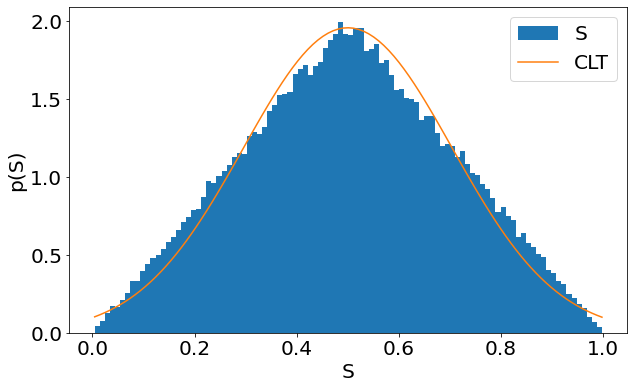

In [7]:
# Istogramma
plt.hist(S,bins=100,density=True,label="S")

# Distribuzione teorica CLT
xmin=np.min(S)
xmax=np.max(S)
x = np.linspace(xmin,xmax,101)
g=stats.norm(loc=mu, scale=sigma) 
plt.plot(x, g.pdf(x), label="CLT")
plt.legend()
plt.xlabel("S")
plt.ylabel("p(S)")
plt.show()

## Esercizio

Ripetere il calcolo con una distribuzione di variabili esponenziale.

$$ p_{\lambda}(x) = \lambda e^{-\lambda x} $$

A parità di N esplorare l'effetto del parametro $\lambda$ sulla convergenza della distribzione della media verso la Gaussiana. 

Suddivido l'esercizio in due parti, nella prima parte verifico la convergenza della distribuzione esponenziale secondo il teorema del limite centrale, nella seconda parte invece valuto, al variare del parametro $\lambda$ per un numero di ripetizioni fissate.

### Convergenza della distribuzione esponenziale

In [76]:
n=4 #numero di variabili da sommare
np.random.seed(0)
N = [i*10**i for i in range(3,7)]
print(N)

[3000, 40000, 500000, 6000000]


In [77]:
lamda = 0.7 
S = [np.zeros(N[i]) for i in range(len(N))]
#per ciascun valore di i il vettore degli N è più lungo

#utilizza una matrice in cui le colonne sono diversi N
for i in range(len(S)): #che dovrebbe avere lunghezza 5
    for j in range(N[i]): #per i che varia all'interno del numero di N assegnato
        S[i][j]=S[i][j]+np.sum(np.random.exponential(lamda,n))/n

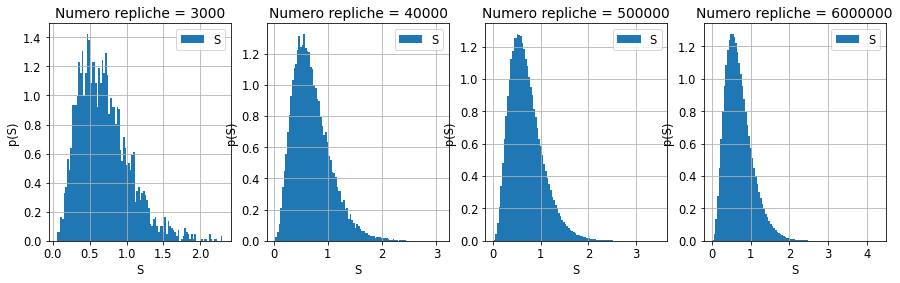

In [78]:
plt.rcParams.update({'font.size': 8})

#creo una figura con un vettore di grafici
fig, plts = plt.subplots(1,len(S))

for i in range(len(S)):
    xmin=np.min(S[i])
    xmax=np.max(S[i])
    x = np.linspace(xmin,xmax,101)
    plts[i].hist(S[i],bins=100,density=True,label="S") #plot dell'istogramma
    #plts[i].plot(x, g.pdf(x), label="CLT")
    plts[i].set_title('Numero repliche = ' + str(len(S[i])))
    plts[i].set_xlabel("S")
    plts[i].set_ylabel("p(S)")
    plts[i].grid(True)
    plts[i].legend()
    
fig.set_figwidth(15)
fig.set_figheight(4)

### Studio la convergenza al variare di $\lambda$

In questo caso ripeto lo stesso studio fatto in precedenza ma ancizhè far variare il numero di repliche vario il valore del parametro $\lambda$.

In [81]:
n=4 #numero di variabili da sommare
np.random.seed(0)
lamda = [0.5*10*i for i in range(2,9)]
print(lamda)

[10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0]


In [74]:
S = [np.zeros(500000) for i in range(len(lamda))]
#per ciascun valore di i il vettore degli N è più lungo

#utilizza una matrice in cui le colonne sono diversi N
for i in range(len(lamda)): #che dovrebbe avere lunghezza 5
    for j in range(len(S[i])): #per i che varia all'interno del numero di N assegnato
        S[i][j]=S[i][j]+np.sum(np.random.exponential(lamda[i],n))/n

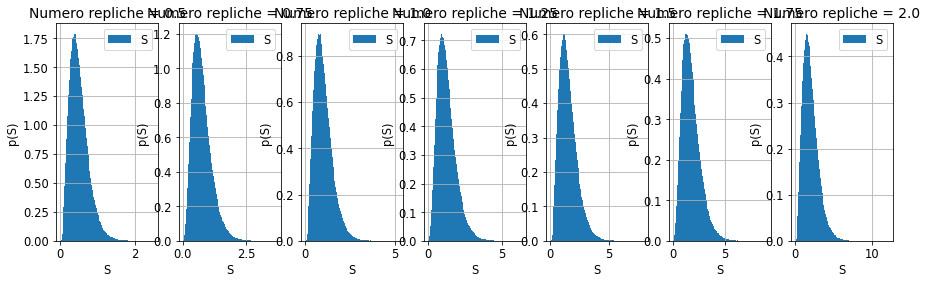

In [75]:
plt.rcParams.update({'font.size': 8})

#creo una figura con un vettore di grafici
fig, plts = plt.subplots(1,len(lamda))

for i in range(len(lamda)):
    xmin=np.min(S[i])
    xmax=np.max(S[i])
    x = np.linspace(xmin,xmax,101)
    plts[i].hist(S[i],bins=100,density=True,label="S") #plot dell'istogramma
    plts[i].set_title('Numero repliche = ' + str(lamda[i]))
    plts[i].set_xlabel("S")
    plts[i].set_ylabel("p(S)")
    plts[i].grid(True)
    plts[i].legend()
    
fig.set_figwidth(15)
fig.set_figheight(4)

## Distribuzione di Levy

Consideriamo ora la somma di variabili distribuite con una distribuzione a legge di potenza

$$ p(x) = x^{-a} \; \; x>1$$ 

se l'esponente $a < 2$ la distribuzione della somma non converge più alla Gaussiana ma alla distribuzione di Levy.

In [48]:
N=100 #numero di variabili da sommare
NR=100000 #numero di realizzazioni
a=1.5 #esponente

In [49]:
S=np.zeros(NR) # inizializzazione

for i in range(NR):
    x =np.random.rand(N)
    y=(1-x)**(1/(1-a))
    S[i]=S[i]+np.sum(y)/N

In [50]:
# Calcoliamo media e varianza
mu_S=np.mean(S)
sigma_S=np.std(S)

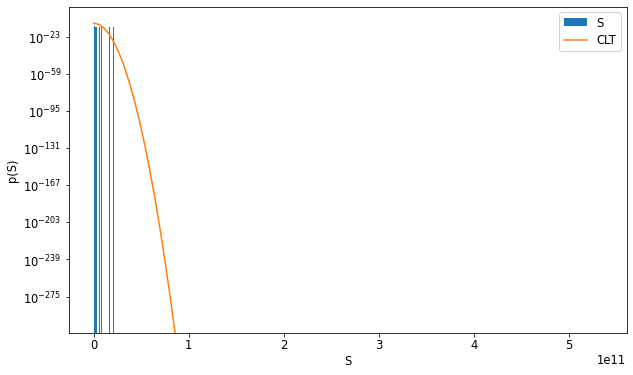

In [51]:
# Istogramma
plt.hist(S,bins=1000,density=True,label="S", log=True)
# Distribuzione teorica CLT
xmin=np.min(S)
xmax=np.max(S)
x = np.linspace(xmin,xmax,101)
g=stats.norm(loc=mu_S, scale=sigma_S) 
plt.plot(x, g.pdf(x), label="CLT")
plt.legend()
plt.xlabel("S")
plt.ylabel("p(S)")
plt.show()

In [52]:
# calcoliamo il logaritmo di S
logS=np.log(S)

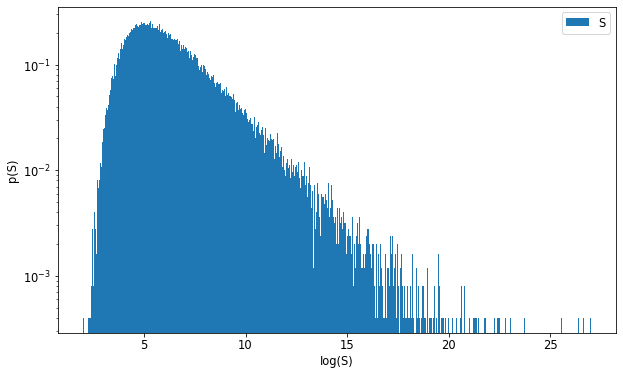

In [53]:
# Istogramma del log in scala log
plt.hist(logS,bins=1000,density=True,label="S", log=True)
plt.legend()
plt.xlabel("log(S)")
plt.ylabel("p(S)")
plt.show()